ALZHEIMER'S (CNN ALGORITHM) (BY:P SWATHIKA)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE=224
BATCH_SIZE=32

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [4]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/extra_need/Datas/Alzhmeir/Train',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  subset='training')

Found 640 images belonging to 4 classes.


In [5]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/extra_need/Datas/Alzhmeir/Train',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  subset='validation')

Found 160 images belonging to 4 classes.


In [6]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("Class indices:",class_indices)
print("Class names:",class_names)

Class indices: {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
Class names: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [7]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_generator,epochs=7,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
20/20 ━━━━━━━━━━━━━━━━━━━━ 175s 8s/step - accuracy: 0.2522 - loss: 1.5123 - val_accuracy: 0.2812 - val_loss: 1.3683
Epoch 2/7
20/20 ━━━━━━━━━━━━━━━━━━━━ 94s 5s/step - accuracy: 0.3707 - loss: 1.2825 - val_accuracy: 0.3438 - val_loss: 1.3416
Epoch 3/7
20/20 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.4914 - loss: 1.1234 - val_accuracy: 0.4688 - val_loss: 1.1685
Epoch 4/7
20/20 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - accuracy: 0.6358 - loss: 0.8538 - val_accuracy: 0.5688 - val_loss: 1.0419
Epoch 5/7
20/20 ━━━━━━━━━━━━━━━━━━━━ 91s 5s/step - accuracy: 0.7124 - loss: 0.6813 - val_accuracy: 0.5938 - val_loss: 1.0080
Epoch 6/7
20/20 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.8033 - loss: 0.4254 - val_accuracy: 0.5625 - val_loss: 1.0449
Epoch 7/7
20/20 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - accuracy: 0.8846 - loss: 0.2943 - val_accuracy: 0.5875 - val_loss: 1.1599


In [10]:
model.save('/content/drive/MyDrive/extra_need/h5_pkl/Alzhmeir.h5')

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/extra_need/h5_pkl/Alzhmeir.h5')
print("Model Loaded")

Model Loaded


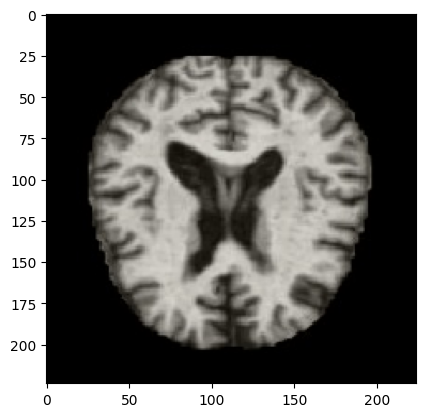

In [12]:
test_image_path='/content/drive/MyDrive/extra_need/Datas/Alzhmeir/Train/ModerateDemented/00c4466b-2eba-49c7-9809-83787aabb4cd.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [13]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [14]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
MildDemented
